In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from bioinfokit.analys import stat

In [7]:
df_melt = pd.read_csv('../Reading/Remove Outlier Chauvenet.csv')
df_melt

,Unnamed: 0,index,pH,value
0,0,11,pH 2.17,-0.414747
1,1,12,pH 2.17,-0.414747
2,2,13,pH 2.17,-0.414747
3,3,14,pH 2.17,-0.368664
4,4,15,pH 2.17,-0.368664
...,...,...,...,...
4746,4746,4995,pH 13.15,0.320152
4747,4747,4996,pH 13.15,0.329278
4748,4748,4997,pH 13.15,0.333840
4749,4749,4998,pH 13.15,0.362738


In [8]:
new = ols('value ~ pH', data = df_melt).fit()
an = sm.stats.anova_lm(new, typ=2)
an

,sum_sq,df,F,PR(>F)
pH,48.263651,4.0,461.462077,0.0
Residual,124.094318,4746.0,NaN,NaN


In [9]:
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='pH', anova_model='value ~ C(pH)', phalpha=0.01)
df_tukey = res.tukey_summary
df_tukey.to_excel('../Reading/TukeyHSD_result_relative_error.xlsx')
df_tukey

g:\Program\Python\__env\Yolo2TFLite\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,pH 2.17,pH 5.75,0.035670,0.010334,0.061006,6.483983,0.001
1,pH 2.17,pH 7.73,0.269441,0.244138,0.294743,49.042463,0.001
2,pH 2.17,pH 10.36,0.103730,0.078455,0.129005,18.901027,0.001
3,pH 2.17,pH 13.15,0.210402,0.185127,0.235677,38.338285,0.001
4,pH 5.75,pH 7.73,0.233770,0.210126,0.257415,45.533534,0.001
5,pH 5.75,pH 10.36,0.068059,0.044444,0.091675,13.273102,0.001
6,pH 5.75,pH 13.15,0.174732,0.151117,0.198347,34.076600,0.001
7,pH 7.73,pH 10.36,0.165711,0.142132,0.189290,32.366385,0.001
8,pH 7.73,pH 13.15,0.059038,0.035459,0.082618,11.531279,0.001
9,pH 10.36,pH 13.15,0.106673,0.083123,0.130222,20.861264,0.001


In [10]:
df_u = df_melt.pivot(columns='pH', values='value')
df_2_17 = df_u['pH 2.17'].dropna().reset_index(drop=True)
df_5_75 = df_u['pH 5.75'].dropna().reset_index(drop=True)
df_7_73 = df_u['pH 7.73'].dropna().reset_index(drop=True)
df_10_36 = df_u['pH 10.36'].dropna().reset_index(drop=True)
df_13_15 = df_u['pH 13.15'].dropna().reset_index(drop=True)


val = {
    "pH 2.17" : df_2_17,
    "pH 5.75" : df_5_75,
    "pH 7.73" : df_7_73,
    "pH 10.36" : df_10_36,
    "pH 13.15" : df_13_15
}

In [11]:
f_stat, p_value = scipy.stats.f_oneway(df_2_17, df_5_75, df_7_73, df_10_36, df_13_15)
p_value

0.0

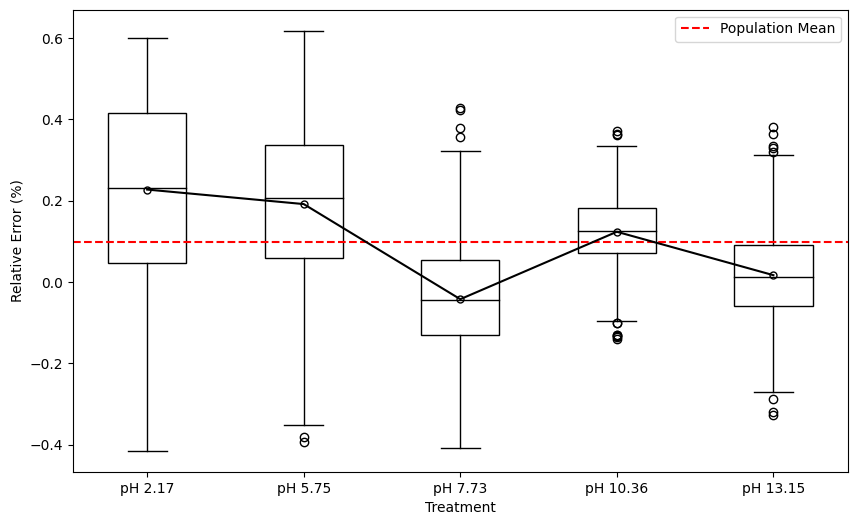

In [12]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(6)

ph_name = []
mean = [None]
for i in val.keys():
    mean.append((val[i].mean()))

plt.boxplot(
    val.values(),  
    patch_artist=True, 
    boxprops=dict(facecolor="w", color="k"),
    medianprops=dict(color='k')
)
ax.axhline(df_melt['value'].mean(), color='r', label='Population Mean', linestyle='--')
ax.plot(['', 'pH 2.17', 'pH 5.75', 'pH 7.73', 'pH 10.36', 'pH 13.15'], mean, marker='o',markerfacecolor='none', ms=5, markeredgecolor='k', color='k')
ax.set_xticklabels(['pH 2.17', 'pH 5.75', 'pH 7.73', 'pH 10.36', 'pH 13.15'])
ax.set_xlabel('Treatment')
ax.set_ylabel('Relative Error (%)')

plt.legend()
plt.savefig('../Reading/img/Boxplot mean data.png')

plt.show()

In [13]:
scipy.stats.f.ppf(q=1-.01, dfn=4, dfd=4746)

3.3231220461040656

In [14]:
val

{'pH 2.17': 0     -0.414747
 1     -0.414747
 2     -0.414747
 3     -0.368664
 4     -0.368664
          ...   
 762    0.599078
 763    0.599078
 764    0.599078
 765    0.599078
 766    0.599078
 Name: pH 2.17, Length: 767, dtype: float64,
 'pH 5.75': 0     -0.393043
 1     -0.380870
 2     -0.351304
 3     -0.349565
 4     -0.335652
          ...   
 984    0.596522
 985    0.598261
 986    0.600000
 987    0.612174
 988    0.617391
 Name: pH 5.75, Length: 989, dtype: float64,
 'pH 7.73': 0     -0.407503
 1     -0.404916
 2     -0.404916
 3     -0.403622
 4     -0.395860
          ...   
 990    0.320828
 991    0.355757
 992    0.379043
 993    0.421734
 994    0.426908
 Name: pH 7.73, Length: 995, dtype: float64,
 'pH 10.36': 0     -0.140927
 1     -0.134170
 2     -0.133205
 3     -0.131274
 4     -0.129344
          ...   
 995    0.333977
 996    0.334942
 997    0.361969
 998    0.363900
 999    0.371622
 Name: pH 10.36, Length: 1000, dtype: float64,
 'pH 13.15': 0     -0.326

In [28]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df_melt['value'], df_melt['pH'])
post_hoc_res = comp.tukeyhsd(alpha=0.001)
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
pH 10.36,pH 13.15,-0.1067,0.001,-0.1347,-0.0786,True
pH 10.36,pH 2.17,0.1037,0.001,0.0736,0.1338,True
pH 10.36,pH 5.75,0.0681,0.001,0.0399,0.0962,True
pH 10.36,pH 7.73,-0.1657,0.001,-0.1938,-0.1376,True
pH 13.15,pH 2.17,0.2104,0.001,0.1803,0.2405,True
pH 13.15,pH 5.75,0.1747,0.001,0.1466,0.2029,True
pH 13.15,pH 7.73,-0.059,0.001,-0.0871,-0.0309,True
pH 2.17,pH 5.75,-0.0357,0.001,-0.0659,-0.0055,True
pH 2.17,pH 7.73,-0.2694,0.001,-0.2996,-0.2393,True
pH 5.75,pH 7.73,-0.2338,0.001,-0.2619,-0.2056,True


# Check Normality

In [30]:
import scipy.stats as stats
w, pvalue = stats.shapiro(new.resid)
print(w, pvalue)

0.9867873191833496 1.0830151359947482e-20


# Check Homogeinity

In [29]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df_2_17, df_5_75, df_7_73, df_10_36, df_13_15)
print(w, pvalue)

1238.9518642735688 5.724610479810109e-267


In [31]:
print((246/6000) * 100)

4.1000000000000005
